In [25]:
# Add directory above current directory to path
import sys; 
if not ".." in sys.path:
    sys.path.insert(0, '..')
    
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy import stats

sns.set(style="darkgrid")

from utils.data_utils import *

%load_ext autoreload
%autoreload 2

#run this cell for fullscreen jupyter cells
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def prepare_result(customer_data, result_data):
    """
    Concatenate customer base frame with entropy result frame for quick Seaborn plot building
    """
    
    dfs = [customer_data, result_data]
    
    return pd.concat(dfs, axis=1)

In [3]:
#set up data and result paths
customer_base_path = "../DATA_GYM/sanitized_customer_base.csv"
login_data_path = "../DATA_GYM/sanitized_login_data.csv"
result_folder = "../results/regularity/statistics/2020-03-11/"

In [4]:
login_data = load_login_data(login_data_path)
customer_data = load_customer_data(customer_base_path)

In [5]:
#convert the timedelta columns to floats
customer_data["CONTRACT_DURATION"] = customer_data.apply(lambda x: x.CONTRACT_DURATION / pd.Timedelta(days=1), axis=1)
customer_data["ACTIVE_DURATION"] = customer_data.apply(lambda x: x.ACTIVE_DURATION / pd.Timedelta(days=1), axis=1)

In [6]:
td_regularity_stats = load_result_data(result_folder + "td_regularity_results.csv")
td_regularity_stats

Timedelta_ApEn_m=2_r=0.2  Timedelta_ApEn_m=3_r=0.2  \
CUST_CODE                                                        
10000.10                    0.703883                  0.525281   
10000003.9                  0.693147                       NaN   
10000011.9                  0.693147                       NaN   
10000012.9                  0.977859                  0.356289   
10000013.9                  0.672142                  0.501785   
...                              ...                       ...   
999980.80                   0.627698                  0.502050   
99999997                    0.515077                  0.452232   
99999998                    0.675526                  0.575288   
99999999                    0.774975                  0.656849   
MOVE18.49                        NaN                       NaN   

            Timedelta_ApEn_m=4_r=0.2  Timedelta_SampEn_m=2_r=0.2  \
CUST_CODE                                                          
10000.10                    0.401018                    0.544116   
10000003.9                       NaN                         NaN   
10000011.9                       NaN                         NaN   
10000012.9                  0.074803                    1.760409   
10000013.9                  0.146989                    1.081221   
...                              ...                         ...   
999980.80                   0.427221                    0.552828   
99999997                    0.397910                    0.223321   
99999998                    0.478352                    0.370103   
99999999                    0.570464                    0.498611   
MOVE18.49                        NaN                         NaN   

            Timedelta_SampEn_m=3_r=0.2  Timedelta_SampEn_m=4_r=0.2  \
CUST_CODE                                                            
10000.10                      0.506425                    0.425730   
10000003.9                         NaN                         NaN   
10000011.9                         NaN                         NaN   
10000012.9                    1.791759                    2.197225   
10000013.9                    1.352393                    0.628609   
...                                ...                         ...   
999980.80                     0.498827                    0.509298   
99999997                      0.188470                    0.151278   
99999998                      0.333638                    0.310957   
99999999                      0.440573                    0.406325   
MOVE18.49                          NaN                         NaN   

            Timedelta_PermEn_n=3_lag=1  Timedelta_PermEn_n=5_lag=1  \
CUST_CODE                                                            
10000.10                      0.992342                    0.907178   
10000003.9                    0.000000                         NaN   
10000011.9                    0.000000                         NaN   
10000012.9                    0.994923                    0.903001   
10000013.9                    0.966595                    0.734393   
...                                ...                         ...   
999980.80                     0.986654                    0.839073   
99999997                      0.998896                    0.984242   
99999998                      0.998334                    0.982891   
99999999                      0.993388                    0.962569   
MOVE18.49                          NaN                         NaN   

            Timedelta_PermEn_n=7_lag=1  Timedelta_PermEn_n=9_lag=1  
CUST_CODE                                                           
10000.10                      0.594737                    0.398370  
10000003.9                         NaN                         NaN  
10000011.9                         NaN                         NaN  
10000012.9                    0.565418                    0.375261  
10000013.9                    0.

In [8]:
td_regularity_stats.describe()

Timedelta_ApEn_m=2_r=0.2  Timedelta_ApEn_m=3_r=0.2  \
count             124798.000000             120960.000000   
mean                   0.477682                  0.315751   
std                    0.288974                  0.209570   
min                    0.000361                  0.000064   
25%                    0.245590                  0.133615   
50%                    0.450887                  0.287682   
75%                    0.693147                  0.456552   
max                    1.542029                  1.118480   

       Timedelta_ApEn_m=4_r=0.2  Timedelta_SampEn_m=2_r=0.2  \
count             117229.000000                95608.000000   
mean                   0.222591                    0.929484   
std                    0.166479                    0.514340   
min                    0.000011                    0.007373   
25%                    0.081165                    0.526823   
50%                    0.189232                    0.887303   
75%                    0.326792                    1.257578   
max                    0.871799                    3.663562   

       Timedelta_SampEn_m=3_r=0.2  Timedelta_SampEn_m=4_r=0.2  \
count                83472.000000                72505.000000   
mean                     0.830603                    0.742891   
std                      0.480179                    0.448385   
min                      0.007403                    0.007430   
25%                      0.456017                    0.405465   
50%                      0.766274                    0.693147   
75%                      1.111116                    1.021651   
max                      3.433987                    3.367296   

       Timedelta_PermEn_n=3_lag=1  Timedelta_PermEn_n=5_lag=1  \
count               124798.000000               117229.000000   
mean                     0.874745                    0.642877   
std                      0.221561                    0.239803   
min                      0.000000                    0.000000   
25%                      0.871049                    0.500867   
50%                      0.969987                    0.691130   
75%                      0.989841                    0.835820   
max                      1.000000                    0.990774   

       Timedelta_PermEn_n=7_lag=1  Timedelta_PermEn_n=9_lag=1  
count               110413.000000               104438.000000  
mean                     0.400541                    0.270657  
std                      0.165731                    0.111035  
min                      0.000000                    0.000000  
25%                      0.291479                    0.200358  
50%                      0.413641                    0.277722  
75%                      0.522494                    0.351497  
max                      0.860693                    0.596207

In [16]:
td_result = prepare_result(customer_data, td_regularity_stats)
td_result.describe()

CONTRACT_DURATION  ACTIVE_DURATION     NUM_VISITS  \
count      138563.000000    138563.000000  138563.000000   
mean          611.660592       449.568978      63.952253   
std           551.323127       508.445904      99.670243   
min            30.000000       -19.506111       1.000000   
25%           191.000000        90.000000      10.000000   
50%           425.000000       256.000000      28.000000   
75%           886.331609       625.000000      74.000000   
max          5848.331609      5842.000000    2089.000000   

       Timedelta_ApEn_m=2_r=0.2  Timedelta_ApEn_m=3_r=0.2  \
count             124798.000000             120960.000000   
mean                   0.477682                  0.315751   
std                    0.288974                  0.209570   
min                    0.000361                  0.000064   
25%                    0.245590                  0.133615   
50%                    0.450887                  0.287682   
75%                    0.693147                  0.456552   
max                    1.542029                  1.118480   

       Timedelta_ApEn_m=4_r=0.2  Timedelta_SampEn_m=2_r=0.2  \
count             117229.000000                95608.000000   
mean                   0.222591                    0.929484   
std                    0.166479                    0.514340   
min                    0.000011                    0.007373   
25%                    0.081165                    0.526823   
50%                    0.189232                    0.887303   
75%                    0.326792                    1.257578   
max                    0.871799                    3.663562   

       Timedelta_SampEn_m=3_r=0.2  Timedelta_SampEn_m=4_r=0.2  \
count                83472.000000                72505.000000   
mean                     0.830603                    0.742891   
std                      0.480179                    0.448385   
min                      0.007403                    0.007430   
25%                      0.456017                    0.405465   
50%                      0.766274                    0.693147   
75%                      1.111116                    1.021651   
max                      3.433987                    3.367296   

       Timedelta_PermEn_n=3_lag=1  Timedelta_PermEn_n=5_lag=1  \
count               124798.000000               117229.000000   
mean                     0.874745                    0.642877   
std                      0.221561                    0.239803   
min                      0.000000                    0.000000   
25%                      0.871049                    0.500867   
50%                      0.969987                    0.691130   
75%                      0.989841                    0.835820   
max                      1.000000                    0.990774   

       Timedelta_PermEn_n=7_lag=1  Timedelta_PermEn_n=9_lag=1  
count               110413.000000               104438.000000  
mean                     0.400541                    0.270657  
std                      0.165731                    0.111035  
min                      0.000000                    0.000000  
25%                      0.291479                    0.200358  
50%                      0.413641                    0.277722  
75%                      0.522494                    0.351497  
max                      0.860693                    0.596207

In [ ]:
cd_normalizer = colors.LogNorm(vmin=td_result["CONTRACT_DURATION"].min(), vmax=td_result["CONTRACT_DURATION"].max())
nv_normalizer = colors.LogNorm(vmin=td_result["NUM_VISITS"].min(), vmax=td_result["NUM_VISITS"].max())

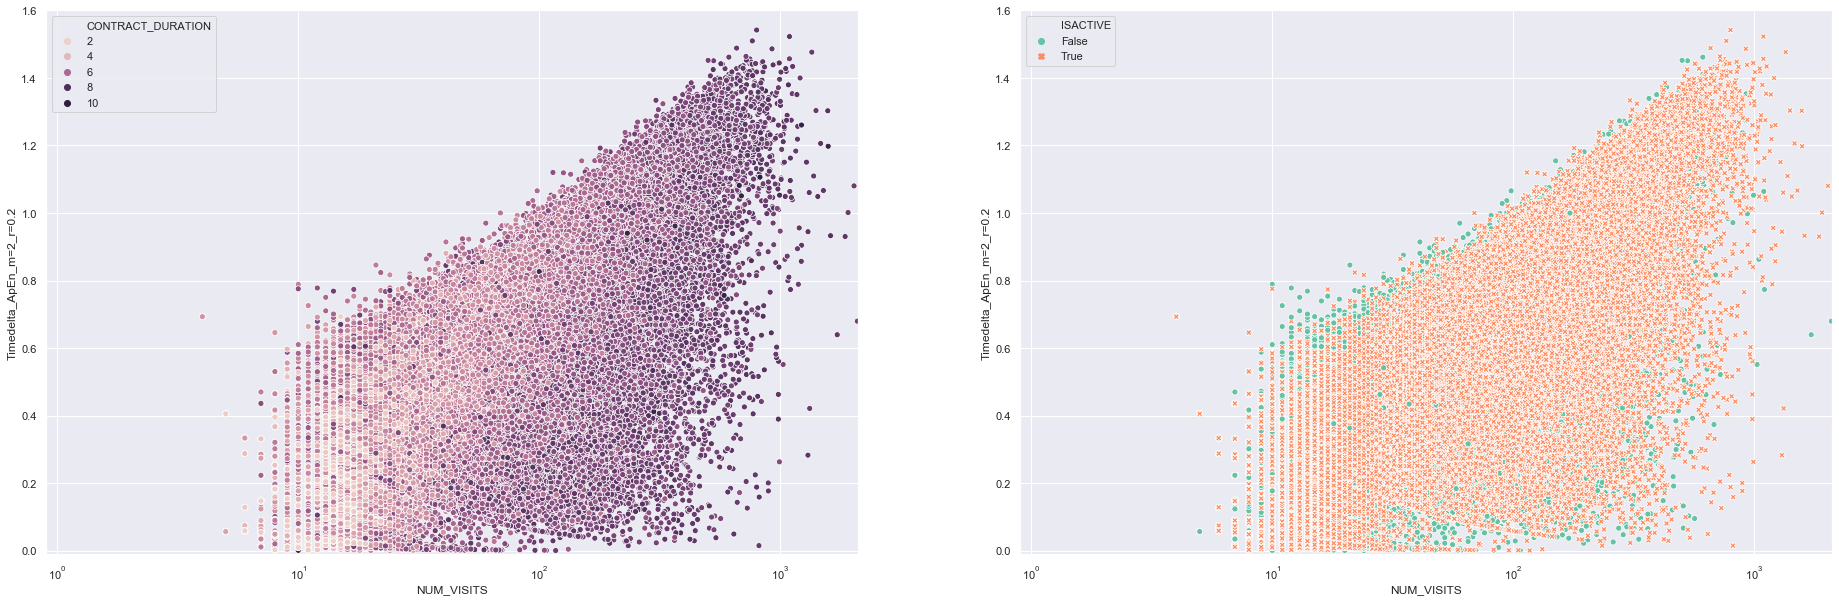

In [15]:
# Initialize figure and ax
# Set up the matplotlib figure
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(32,10), sharex=True)

# Set the scale of the x-and y-axes
ax1.set(xscale="log", xlim=(0.9, 2100), ylim=(-0.01,1.6))
ax2.set(xscale="log", xlim=(0.9, 2100), ylim=(-0.01,1.6))
sns.scatterplot(x="NUM_VISITS", y="Timedelta_ApEn_m=2_r=0.2", hue="CONTRACT_DURATION", hue_norm=cd_normalizer, data=td_result, ax=ax1)
sns.scatterplot(x="NUM_VISITS", y="Timedelta_ApEn_m=2_r=0.2", hue="ISACTIVE", style="ISACTIVE", palette="Set2", data=td_result, ax=ax2)

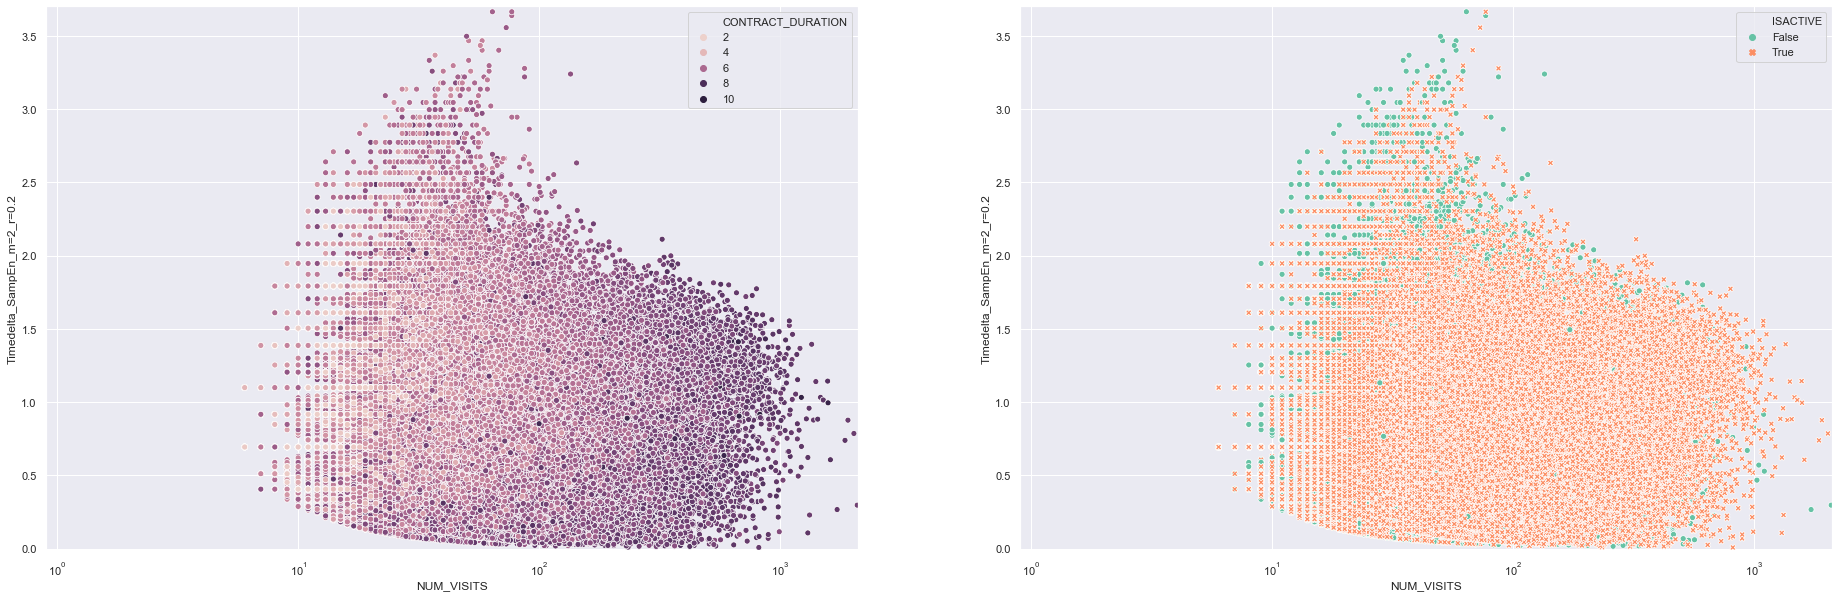

In [11]:
# Initialize figure and ax
# Set up the matplotlib figure
fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(32,10), sharex=True)

# Set the scale of the x-and y-axes
ax3.set(xscale="log", xlim=(0.9, 2100), ylim=(-0.01,3.7))
ax4.set(xscale="log", xlim=(0.9, 2100), ylim=(-0.01,3.7))
sns.scatterplot(x="NUM_VISITS", y="Timedelta_SampEn_m=2_r=0.2", hue="CONTRACT_DURATION", hue_norm=cd_normalizer, data=td_result, ax=ax3)
sns.scatterplot(x="NUM_VISITS", y="Timedelta_SampEn_m=2_r=0.2", hue="ISACTIVE", style="ISACTIVE", palette="Set2", data=td_result, ax=ax4)

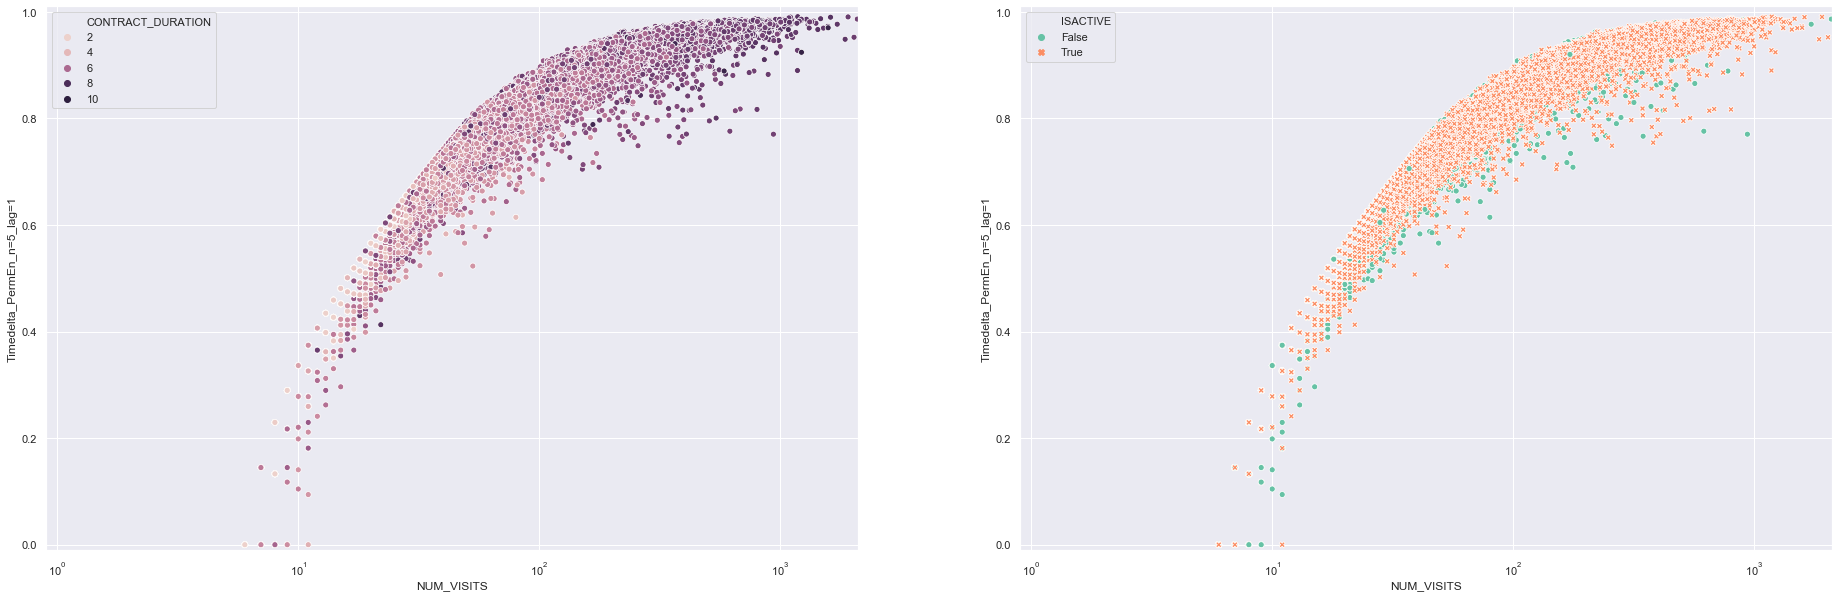

In [12]:
# Initialize figure and ax
# Set up the matplotlib figure
fig3, (ax5, ax6) = plt.subplots(1, 2, figsize=(32,10), sharex=True)

# Set the scale of the x-and y-axes
ax5.set(xscale="log", xlim=(0.9, 2100), ylim=(-0.01,1.01))
ax6.set(xscale="log", xlim=(0.9, 2100), ylim=(-0.01,1.01))
sns.scatterplot(x="NUM_VISITS", y="Timedelta_PermEn_n=5_lag=1", hue="CONTRACT_DURATION", hue_norm=cd_normalizer, data=td_result, ax=ax5)
sns.scatterplot(x="NUM_VISITS", y="Timedelta_PermEn_n=5_lag=1", hue="ISACTIVE", style="ISACTIVE", palette="Set2", data=td_result, ax=ax6)

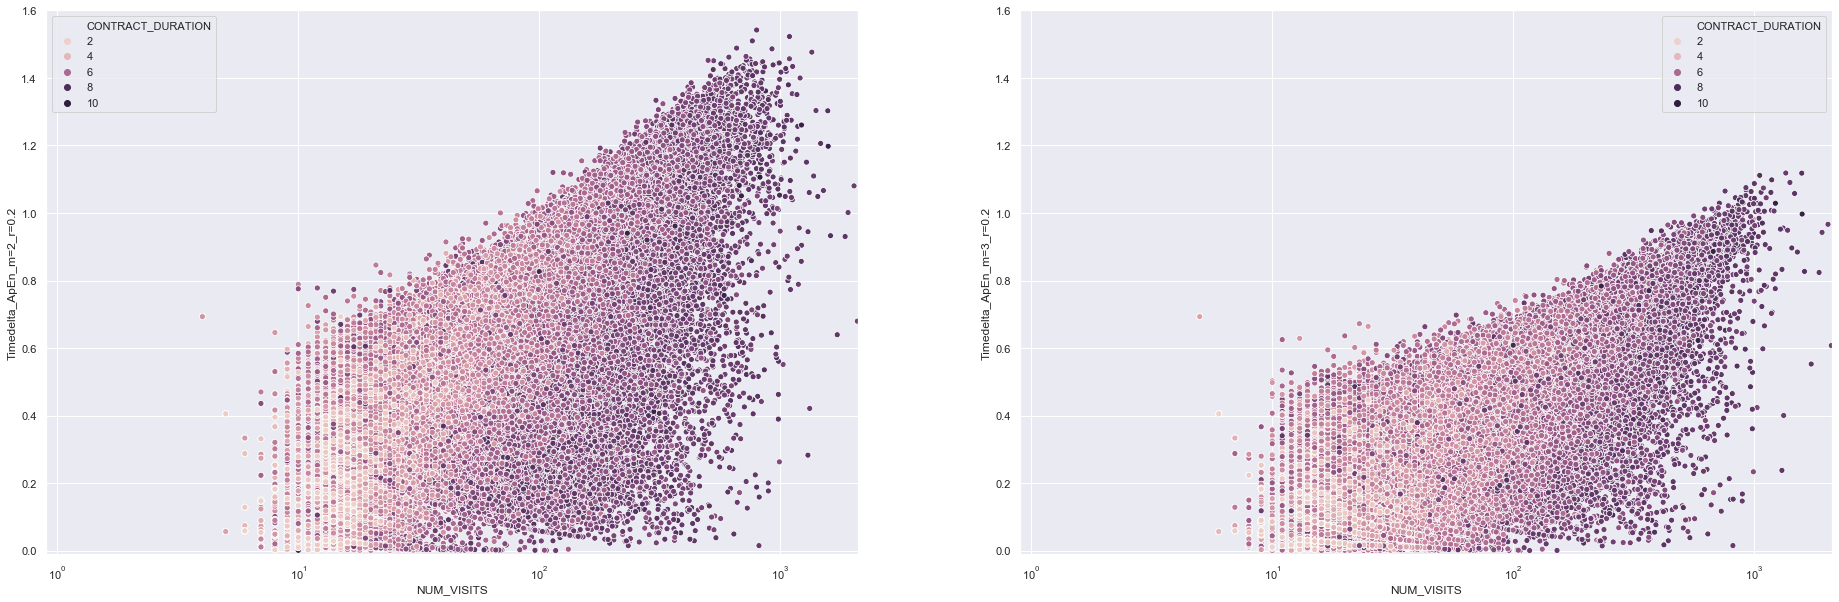

In [21]:
# Initialize figure and ax
# Set up the matplotlib figure
fig4, (ax7, ax8) = plt.subplots(1, 2, figsize=(32,10), sharex=True)

# Set the scale of the x-and y-axes
ax7.set(xscale="log", xlim=(0.9, 2100), ylim=(-0.01,1.6))
ax8.set(xscale="log", xlim=(0.9, 2100), ylim=(-0.01,1.6))
sns.scatterplot(x="NUM_VISITS", y="Timedelta_ApEn_m=2_r=0.2", hue="CONTRACT_DURATION", hue_norm=cd_normalizer, data=td_result, ax=ax7)
sns.scatterplot(x="NUM_VISITS", y="Timedelta_ApEn_m=3_r=0.2", hue="CONTRACT_DURATION", hue_norm=cd_normalizer, data=td_result, ax=ax8)

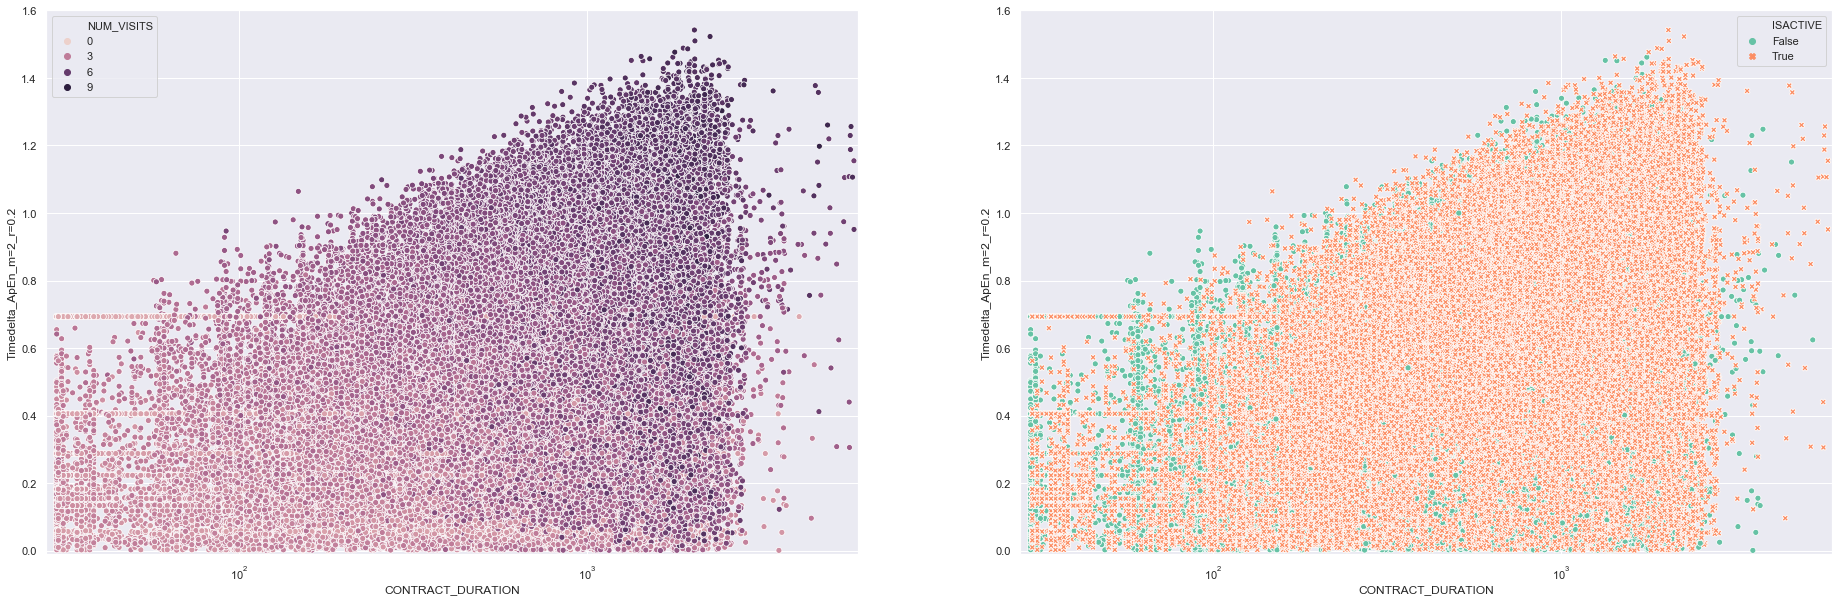

In [20]:
# Initialize figure and ax
# Set up the matplotlib figure
fig5, (ax9, ax10) = plt.subplots(1, 2, figsize=(32,10), sharex=True)

# Set the scale of the x-and y-axes
ax9.set(xscale="log", xlim=(28, 6000), ylim=(-0.01,1.6))
ax10.set(xscale="log", xlim=(28, 6000), ylim=(-0.01,1.6))
sns.scatterplot(x="CONTRACT_DURATION", y="Timedelta_ApEn_m=2_r=0.2", hue="NUM_VISITS", hue_norm=nv_normalizer, data=td_result, ax=ax9)
sns.scatterplot(x="CONTRACT_DURATION", y="Timedelta_ApEn_m=2_r=0.2", hue="ISACTIVE", style="ISACTIVE", palette="Set2", data=td_result, ax=ax10)

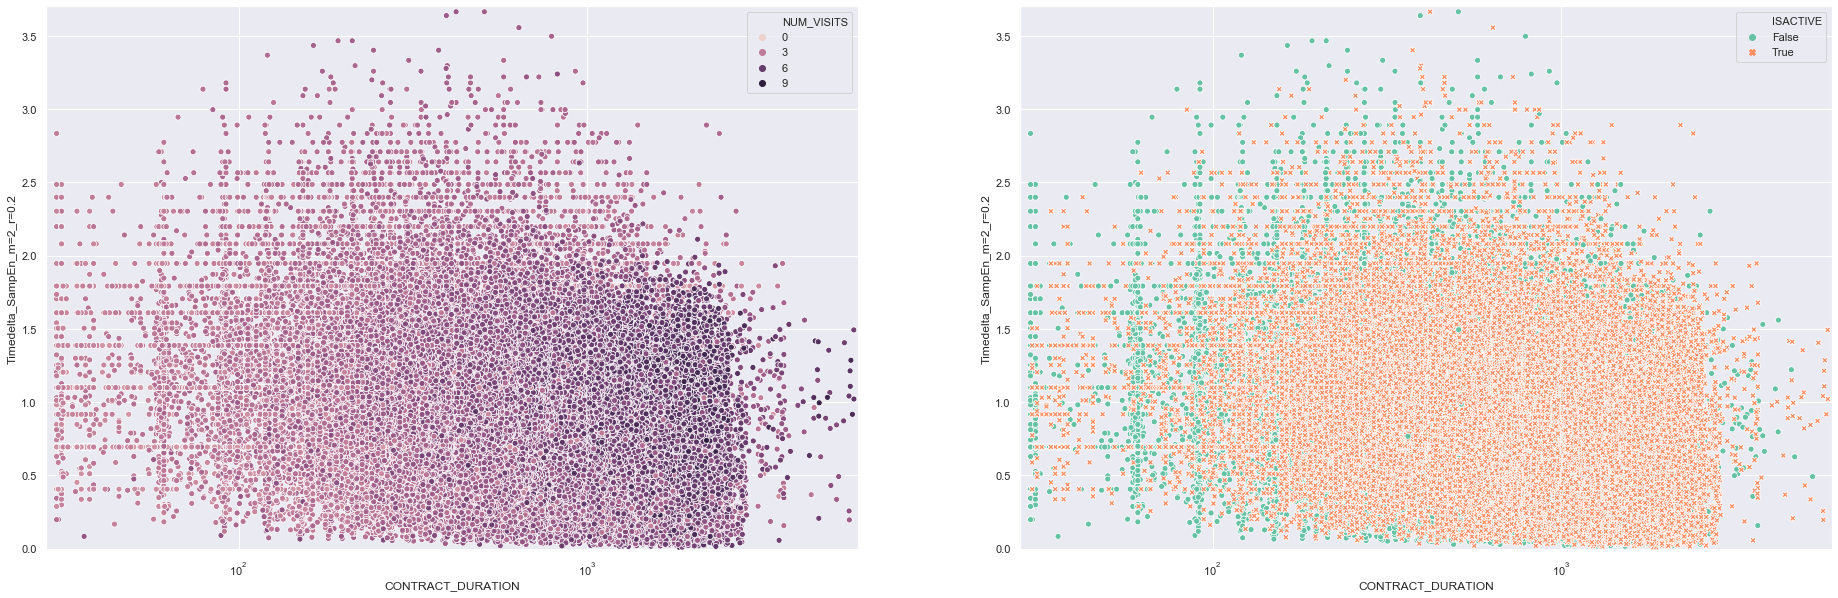

In [22]:
# Initialize figure and ax
# Set up the matplotlib figure
fig6, (ax11, ax12) = plt.subplots(1, 2, figsize=(32,10), sharex=True)

# Set the scale of the x-and y-axes
ax11.set(xscale="log", xlim=(28, 6000), ylim=(-0.01,3.7))
ax12.set(xscale="log", xlim=(28, 6000), ylim=(-0.01,3.7))
sns.scatterplot(x="CONTRACT_DURATION", y="Timedelta_SampEn_m=2_r=0.2", hue="NUM_VISITS", hue_norm=nv_normalizer, data=td_result, ax=ax11)
sns.scatterplot(x="CONTRACT_DURATION", y="Timedelta_SampEn_m=2_r=0.2", hue="ISACTIVE", style="ISACTIVE", palette="Set2", data=td_result, ax=ax12)

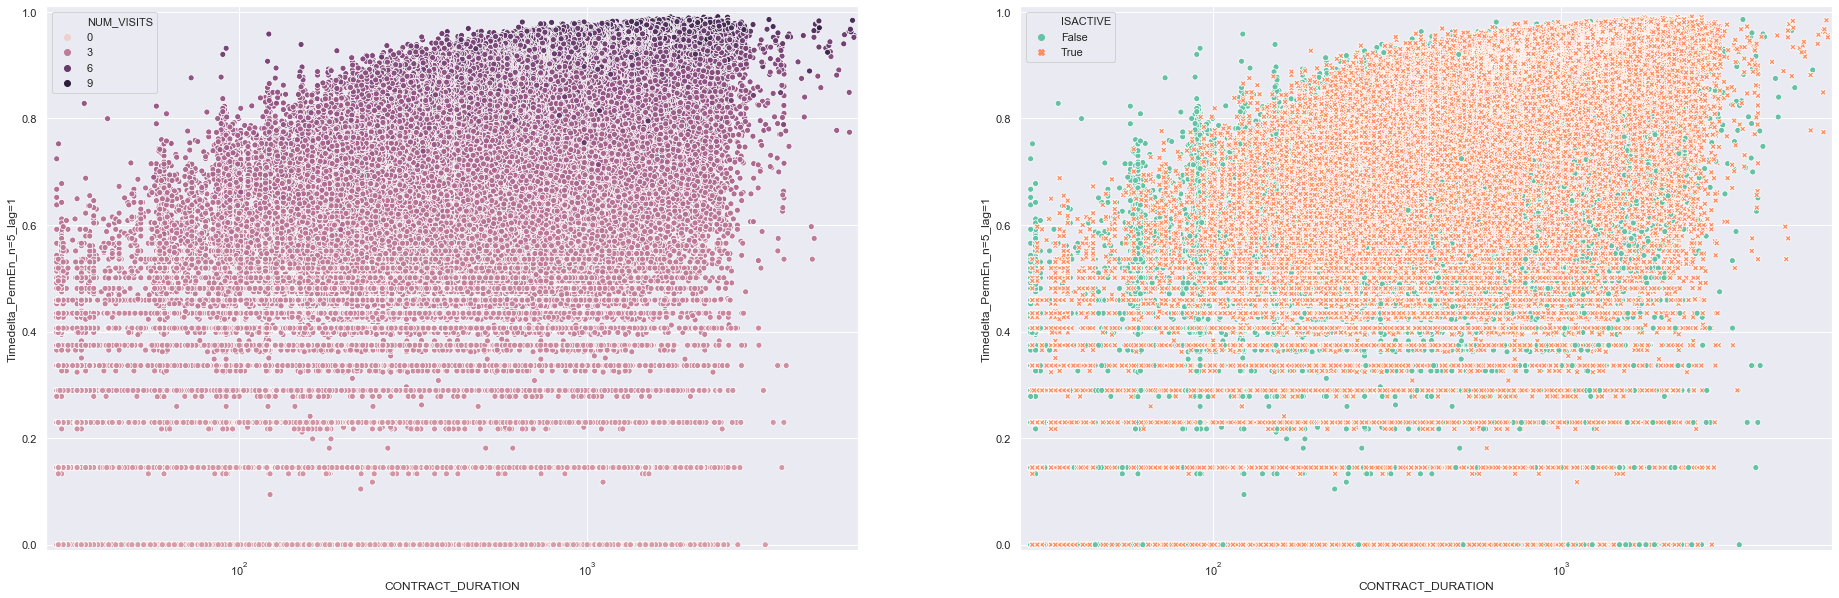

In [24]:
# Initialize figure and ax
# Set up the matplotlib figure
fig7, (ax13, ax14) = plt.subplots(1, 2, figsize=(32,10), sharex=True)

# Set the scale of the x-and y-axes
ax13.set(xscale="log", xlim=(28, 6000), ylim=(-0.01,1.01))
ax14.set(xscale="log", xlim=(28, 6000), ylim=(-0.01,1.01))
sns.scatterplot(x="CONTRACT_DURATION", y="Timedelta_PermEn_n=5_lag=1", hue="NUM_VISITS", hue_norm=nv_normalizer, data=td_result, ax=ax13)
sns.scatterplot(x="CONTRACT_DURATION", y="Timedelta_PermEn_n=5_lag=1", hue="ISACTIVE", style="ISACTIVE", palette="Set2", data=td_result, ax=ax14)